# Customer Behavior Analysis



Dataset resource: https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

The dataset is not pushed to Github due to big size of it so before run this notebook, please download the dataset in the above link.



## Section 1: Brand Analysis
Do users prefer the products of a specific brand?

In [1]:
import pandas as pd

df = pd.read_csv('2019-Oct.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [3]:
products_without_brand = df[(df.brand.isna()) & (df.event_type == 'purchase')] #purchased no-brand product
products_with_brand = df[(df.brand.notna()) & (df.event_type == 'purchase')] #purchased brand product

In [ ]:
#calculate % of bought products with brand and without brand
len_total = len(df[df.event_type == 'purchase'])

pur_no_brand = len(products_without_brand)/len_total
pur_brand = len(products_with_brand)/len_total

print('% of bought no-brand products: ', pur_no_brand * 100, '%')
print('% of bought brand products: ', pur_brand * 100, '%')

### The hypothesis
The product with a brand name has a higher probability of getting bought than the product without a brand. Thus, more bugdet should be allotted to the advertisement of branded products.

# Customer Activity Analysis

What is the user’s activity(view, cart, buy) throughout the day?

This will reveal the hour of the day on which the most or least number of views occur for the website.


In [48]:
df['event_time'] = pd.to_datetime(df.event_time) #convert to datetime type
#Get hour column(0-23)
df['hour'] = df['event_time'].map(lambda x: x.hour)

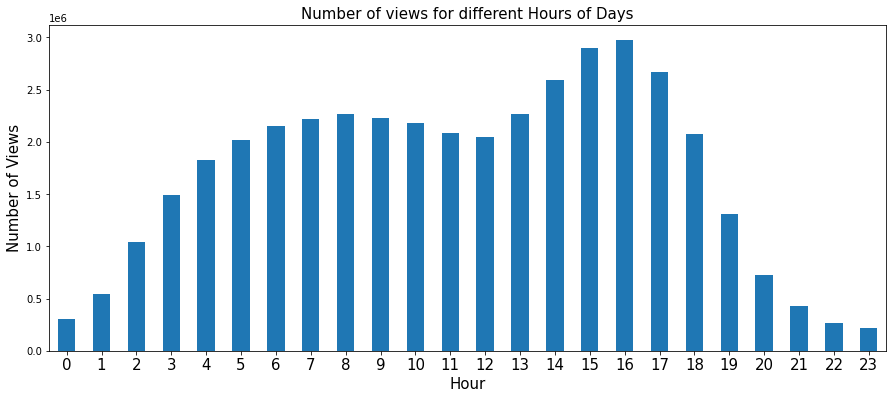

In [52]:
viewed = df[df['event_type'] == 'view']

# Plot the number views against all week days in a line chart
view_plot = viewed.groupby('event_type')['hour'].value_counts().sort_index().plot(kind = 'bar', figsize = (15,6))
view_plot.set_xlabel('Hour',fontsize = 15)
view_plot.set_ylabel('Number of Views',fontsize = 15)
view_plot.set_xticklabels(range(0,24), rotation='horizontal', fontsize=15)
view_plot.set_title('Number of views for different Hours of Days',fontsize = 15);
#plot the graph
#plt.show()

### The hypothesis
From the above charts, it can be inferred that most of the users like to browse the items during working hourse in working days.

# Identifying Famous Brands and Categories
Items from which brands and categories are most preferred by users?

Knowing brands and categories are best-selling in the market can optimize inventory management.






In [76]:
# Top brands
purchase = df[df['event_type'] == 'purchase']
top_brands = purchase.groupby('brand')['brand'].agg([len])
top_brands.sort_values('len', ascending = False, inplace = True)
print(top_brands)

              len
brand            
samsung    172896
apple      142873
xiaomi      56616
huawei      23501
lucente     11578
...           ...
plantex         1
playmates       1
libbey          1
alser           1
borasco         1

[1983 rows x 1 columns]


In [77]:
# Top categories
top_cate = purchase.groupby('category_code')['category_code'].agg([len])
top_cate.sort_values('len', ascending = False, inplace = True)
print(top_cate)

                                 len
category_code                       
electronics.smartphone        338018
electronics.audio.headphone    30503
electronics.video.tv           21565
electronics.clocks             17906
appliances.kitchen.washer      16148
...                              ...
apparel.skirt                      4
apparel.shorts                     2
apparel.jumper                     2
construction.tools.soldering       1
apparel.jacket                     1

[121 rows x 1 columns]


### The hypothesis
According to the above analysis, the top brands all include mobile and mobile accessory companies.

-> All products having the smartphone category should be in abundance in the inventory.

# RFM Analysis

RFM stands for recency, frequency, and monetary, respectively.

- Recency: How many days have passed since a customer has bought an item

- Frequency: How many orders a customer has placed

- Monetary: How much money a customer has spent

Can we effectively conduct targeted marketing?

In [50]:
#Get necessary data
df['event_time'] = pd.to_datetime(df.event_time)
purchased = df[df.event_type == 'purchase'][['user_id', 'user_session', 'event_time' ,'price']]




2019-10-31 23:59:16+00:00


In [63]:
print(int(str(purchased['event_time'].max()).split()[0].split('-')[2])+1)

32


In [65]:
#Compute the RFM metrics for each customer
rfm = purchased.groupby('user_id').agg({'event_time': lambda date: ((purchased['event_time'].max()) - date.max()),
                                    'user_session': lambda num: num.count(),
                                    'price': lambda price: price.sum()})

rfm['event_time'] = rfm['event_time'].apply(lambda days: int(str(days).split(' days')[0]) + 1)


rfm.columns=['recency','frequency','monetary']


                event_time  user_session    price
user_id                                          
264649825 25 days 03:23:05             2  1240.04
303160429 18 days 10:33:47             1   340.59
340041246 17 days 09:13:37             4   915.52
371877401 22 days 08:08:08             1    29.89
384989212 13 days 12:39:17             1    41.44
...                    ...           ...      ...
566270177  0 days 01:27:59             1    75.94
566272569  0 days 00:35:04             2   254.84
566274637  0 days 00:53:38             1  2011.63
566276996  0 days 00:24:20             1    74.39
566278294  0 days 00:16:30             1  1661.09

[347118 rows x 3 columns]


In [75]:
#Use quantile to compute ranks for each RFM metric
quartiles = rfm.quantile(q=[0.25,0.50,0.75])
#convert to dictionary type
quartiles = quartiles.to_dict() 

In [69]:
# Low values are better for recency and high values are better for frequency and monetary
# 1: highest rank
# 4: lowest rank
# Compute Ranks for Recency metric
def Compute_R(val,metric,quantile):
    if val <= quantile[metric][0.25]:
        return 1
    elif val <= quantile[metric][0.50]:
        return 2
    elif val <= quantile[metric][0.75]: 
        return 3
    else:
        return 4
    
# Compute Ranks for Frequency & Monetary metrics
def Compute_FM(val,metric,quantile):
    if val <= quantile[metric][0.25]:
        return 4
    elif val <= quantile[metric][0.50]:
        return 3
    elif val <= quantile[metric][0.75]: 
        return 2
    else:
        return 1

In [76]:
rfm['R_rank'] = rfm['recency'].apply(Compute_R, args=('recency',quartiles))

# Compute new column with frequency rank of that row
rfm['F_rank'] = rfm['frequency'].apply(Compute_FM, args=('frequency',quartiles))

# Compute new column with monetary rank of that row
rfm['M_rank'] = rfm['monetary'].apply(Compute_FM, args=('monetary',quartiles))


In [77]:
# Convert RFM values to type string
R = rfm.R_rank.astype(str)
F = rfm.F_rank.astype(str)
M = rfm.M_rank.astype(str)

# Compute new colum with combined RFM values
rfm['RFM_Score'] = R + F + M

# Sort the DataFrame by RFM_Socre values
rfm = rfm.sort_values('RFM_Score')
print(rfm)

           recency  frequency  monetary  R_rank  F_rank  M_rank RFM_Score
user_id                                                                  
521401518        4         10   7646.33       1       1       1       111
557935258        1         74   6434.75       1       1       1       111
565321336        3          3   2175.36       1       1       1       111
561251665        1          6   2029.17       1       1       1       111
524164850        5          5   3849.73       1       1       1       111
...            ...        ...       ...     ...     ...     ...       ...
515637007       27          1     41.19       4       4       4       444
519595490       28          1     46.31       4       4       4       444
557053773       27          1     39.38       4       4       4       444
519596586       28          1     72.05       4       4       4       444
518935307       24          1      4.09       4       4       4       444

[347118 rows x 7 columns]


### Comment:
In the table below, The RFM score is mentioned with the corresponding customer group, what it means to have that RFM score, and what type of marketing strategy can be developed to deal with that group of customers.
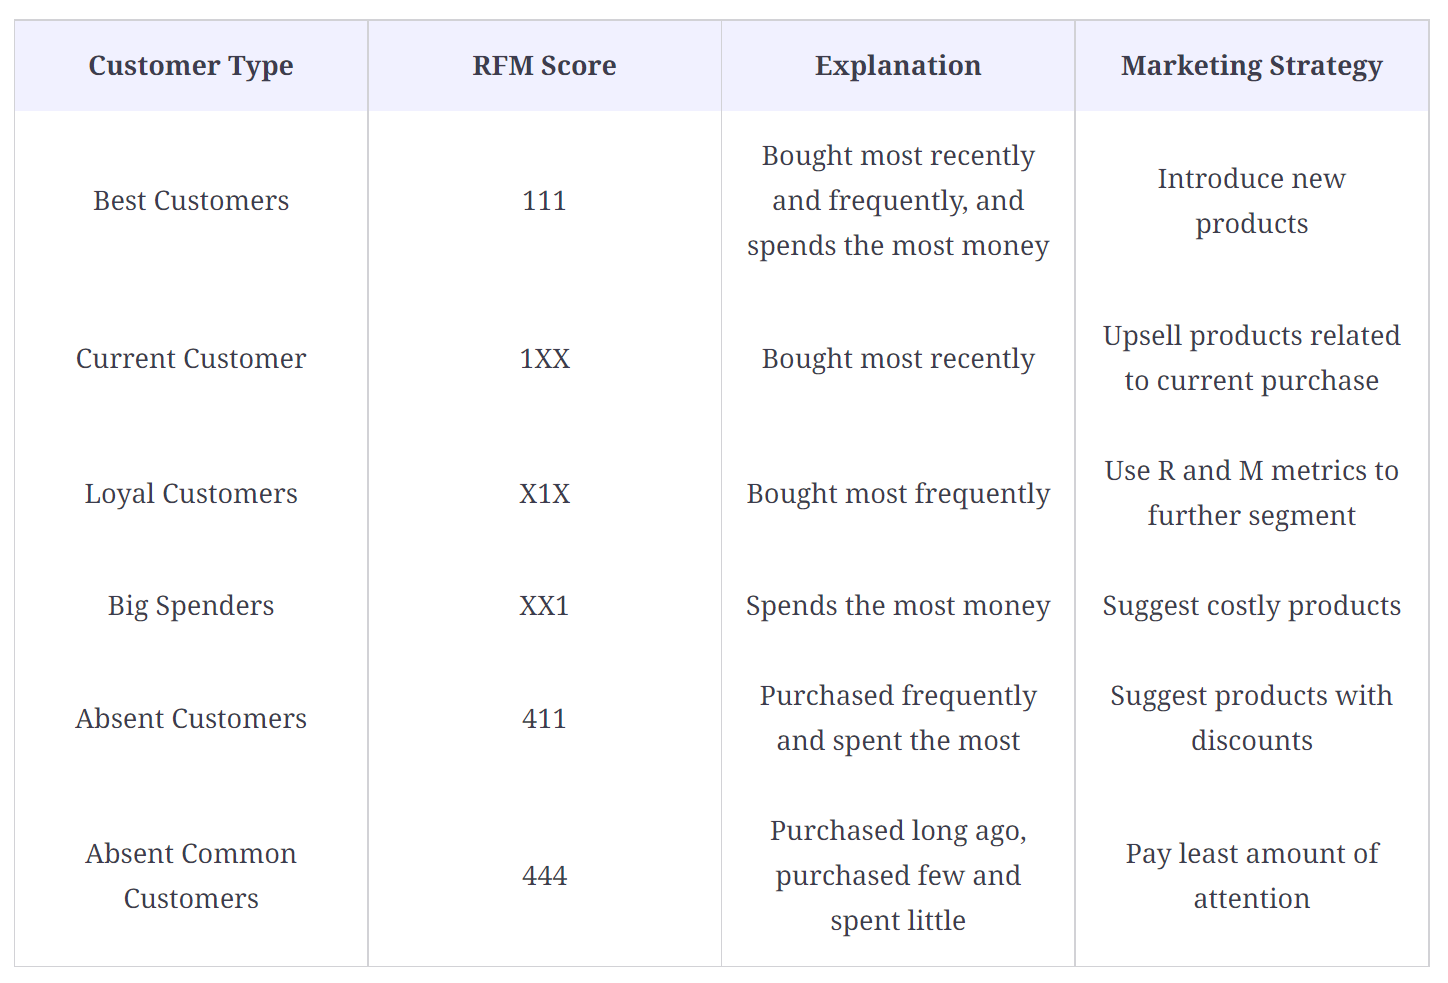